In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Explorar datos de estaciones limnigráficas

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/edsaac/streamlit_ideam/HEAD?labpath=publicar_binder.ipynb)

![Mapa del Río Magdalena](map.png)

In [3]:
datos = pd.read_csv("datos_ideam/dosestaciones.csv")

In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6472 entries, 0 to 6471
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CodigoEstacion    6472 non-null   int64  
 1   NombreEstacion    6472 non-null   object 
 2   Latitud           6472 non-null   float64
 3   Longitud          6472 non-null   float64
 4   Altitud           6472 non-null   int64  
 5   Categoria         6472 non-null   object 
 6   Entidad           6472 non-null   object 
 7   AreaOperativa     6472 non-null   object 
 8   Departamento      6472 non-null   object 
 9   Municipio         6472 non-null   object 
 10  FechaInstalacion  6472 non-null   object 
 11  FechaSuspension   0 non-null      float64
 12  IdParametro       6472 non-null   object 
 13  Etiqueta          6472 non-null   object 
 14  DescripcionSerie  6472 non-null   object 
 15  Frecuencia        6472 non-null   object 
 16  Fecha             6472 non-null   object 


In [5]:
arrancaplumas = datos[datos["CodigoEstacion"] == 21237020]
arrancaplumas = arrancaplumas[["Fecha", "Valor"]]
arrancaplumas["Fecha"] = pd.to_datetime(arrancaplumas["Fecha"], format=r"%Y-%m-%d %H:%M")
arrancaplumas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1773 entries, 0 to 1772
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fecha   1773 non-null   object 
 1   Valor   1773 non-null   float64
dtypes: float64(1), object(1)
memory usage: 41.6+ KB


In [12]:
puertosalgar = datos[datos["CodigoEstacion"] == 23037010]
puertosalgar = puertosalgar[["Fecha", "Valor"]]
puertosalgar["Fecha"] = pd.to_datetime(puertosalgar["Fecha"], format=r"%Y-%m-%d %H:%M")
puertosalgar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4699 entries, 1773 to 6471
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   4699 non-null   datetime64[ns]
 1   Valor   4699 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 110.1 KB


## Mostrar series

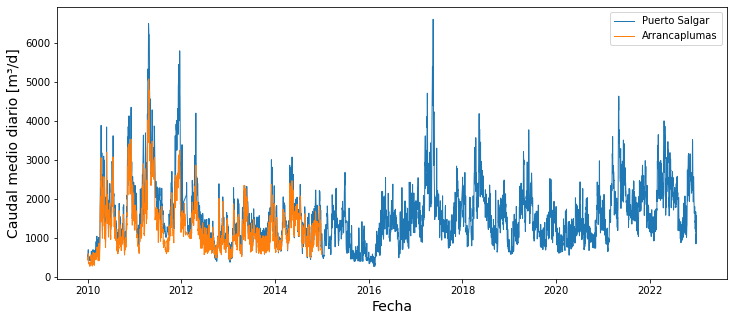

In [14]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(puertosalgar["Fecha"], puertosalgar["Valor"], label="Puerto Salgar", lw=1)
ax.plot(arrancaplumas["Fecha"], arrancaplumas["Valor"], label="Arrancaplumas", lw=1)
ax.set_xlabel("Fecha", fontsize=14)
ax.set_ylabel("Caudal medio diario [m³/d]", fontsize=14)
ax.legend()
plt.show()

In [15]:
combinado = arrancaplumas.merge(puertosalgar, on="Fecha", suffixes=["_Arrancaplumas","_PuertoSalgar"])
combinado

,Fecha,Valor_Arrancaplumas,Valor_PuertoSalgar
0,2010-01-01,480.4,557.7
1,2010-01-02,425.1,510.9
2,2010-01-03,425.1,500.1
3,2010-01-04,489.8,633.0
4,2010-01-05,590.1,693.7
...,...,...,...
1744,2014-12-27,708.2,788.1
1745,2014-12-28,654.0,729.5
1746,2014-12-29,622.6,647.5
1747,2014-12-30,575.9,602.4


In [17]:
combinado.describe(percentiles=[.20,.50,.90])

,Valor_Arrancaplumas,Valor_PuertoSalgar
count,1749.000000,1749.000000
mean,1257.278674,1554.370783
std,638.741245,878.427034
min,270.200000,372.300000
20%,744.000000,865.860000
50%,1098.000000,1342.000000
90%,2152.800000,2654.000000
max,4557.000000,6488.000000


In [18]:
from scipy.stats import linregress
regresión = linregress(combinado["Valor_PuertoSalgar"], combinado["Valor_Arrancaplumas"])
label_regresión = f"""Regresión Lineal: 
$y = {regresión.slope:.3f} * x + {regresión.intercept:.1f}$
R² = {regresión.rvalue**2:.3f}"""

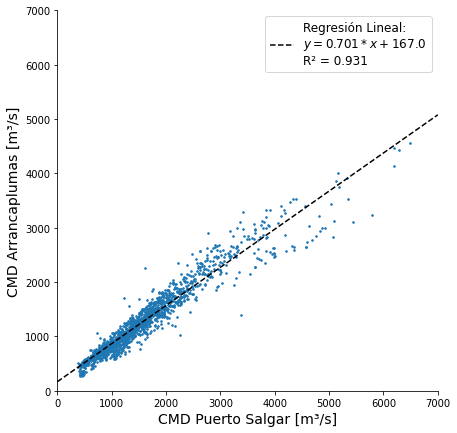

In [21]:
fig, ax = plt.subplots(figsize=(7,7))
ax.set_aspect("equal")
ax.scatter(combinado["Valor_PuertoSalgar"], combinado["Valor_Arrancaplumas"], marker=".", s=10)
ax.axline((0,regresión.intercept), slope=regresión.slope, label=label_regresión, ls="dashed", c="k")
ax.set_xlabel("CMD Puerto Salgar [m³/s]", fontsize=14)
ax.set_ylabel("CMD Arrancaplumas [m³/s]", fontsize=14)
ax.set_ylim(0, 7000)
ax.set_xlim(0, 7000)
ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)
ax.legend(fontsize=12)
plt.show()